In [1]:
# Import des Librairies :

#Librairie d'analyse
import numpy as np
import pandas as pd

#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

#pd.options.display.max_columns = None
#pd.options.display.max_rows = None

#librairie de visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.figure_factory as ff
import plotly.express as px
import plotly.graph_objects as go

# Pour supprimer les warnings :
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def unique_raw (data:pd.DataFrame):
    
    print('-'*100)
    print(" "*41,'\033[1m'+ "Données uniques :"+'\033[0m') # Describe
    print('-'*100)
    
    dico = {} # on crée un dictionnaire de données
    for col in data.columns:
        dico[col] = []
        dico[col].append(round((data[col].nunique()/data.shape[0])*100,2))
        dico[col].append(data[col].nunique())
        
    df = pd.DataFrame.from_dict(data=dico, orient="index", columns = ["Pourcentages_uniques", "Données_uniques"]).sort_values(by="Données_uniques", ascending=True)
    display(df)

def pct_vals_miss(data=pd.DataFrame):
    """
    Permet d'avoir un % de cellules manquantes.

    Parameters :
    ----------
    data: :class: 'Dataframe'
    DataFrame avec le pourcentage de données manquantes.

    """
    # avec un print possibilité d'avoir une visu par colonne
    somme = 0
    for i in list(data.columns):
        somme += data[i].isna().sum()
    return round((somme / (data.shape[0]*data.shape[1]))*100,2)


def miss_value (data:pd.DataFrame) :
    
    """
    Permet d'avoir un % de cellules manquantes.

    Parameters:
    ----------
    
    data: :class:`Dataframe`
    DataFrame avec les pourcentages de données manquantes par colonnes.
    
    """
    
    print('-'*100)
    print(" "*41,'\033[1m'+ "Données manquantes :"+'\033[0m') # Describe
    print('-'*100)

    dico = {} # on crée un dictionnaire de données
    for col in data.columns:
        dico[col] = []
        dico[col].append(round((data[col].notnull().sum()/data.shape[0])*100,2))
        dico[col].append(data[col].isnull().sum())
        
    df = pd.DataFrame.from_dict(data=dico, orient="index", columns = ["Pourcentages", "Données manquantes"]).sort_values(by="Données manquantes", ascending=True)
    display(df)
    
    print('-'*100)
    print(" "*25,'\033[1m'+f"Le pourcentage de données manquantes est de",pct_vals_miss(data),"%"+'\033[0m')
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.from_dict.html => En cas de modif

# Permet de visualiser le DF : 

def visu (data:pd.DataFrame):
    
    """
    Permet d'avoir une visu du df.
    
    Parameters :
    ----------
    
    data: :class:`Dataframe`
    
    DataFrame avec les données basiques du df : 
    
    - shape 
    - head 
    - describe 
    - dtypes
    
    """
   
    print('-'*100)
    print(" "*45,'\033[1m'+ "Shape :"+'\033[0m') # shape
    print('-'*100,"\n")
    print(f"Le nombre de lignes et de colonnes dans le DataFrame sont au nombre de : {data.shape} \n" )
    print('-'*100)
    print(" "*45,'\033[1m'+ "Head :"+'\033[0m') # Head
    print('-'*100)
    display(data.head()) # visualisation du df
    print('-'*100)
    print(" "*45,'\033[1m'+ "Describe :"+'\033[0m') # Describe
    print('-'*100)
    display(data.describe().T) # describe du df chiffre uniquement
    print('-'*100)
    print(" "*41,'\033[1m'+ "Type de données :"+'\033[0m') # Head
    print('-'*100)
    display(data.dtypes)

In [3]:
Data_frame = pd.read_csv('2016-building-energy-benchmarking.csv')
# A la base on avait l'année 2015, mais suite à une modification du projet, l'année 2015 a été supprimé.
## Dans l'année 2015 il y avait un dictionnaire de donnée à modifier en colonne pour obtenir les infos géolocalisées des clients.
### Il y avait également certaines données écrites differemments mais tout en étant similaire.

# Visualisation et nettoyage du DF :

In [4]:
visu (Data_frame)

----------------------------------------------------------------------------------------------------
                                              Shape :
---------------------------------------------------------------------------------------------------- 

Le nombre de lignes et de colonnes dans le DataFrame sont au nombre de : (3376, 46) 

----------------------------------------------------------------------------------------------------
                                              Head :
----------------------------------------------------------------------------------------------------


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


----------------------------------------------------------------------------------------------------
                                              Describe :
----------------------------------------------------------------------------------------------------


,count,mean,std,min,25%,50%,75%,max
OSEBuildingID,3376.0,2.120899e+04,1.222376e+04,1.00000,19990.750000,2.311200e+04,2.599425e+04,5.022600e+04
DataYear,3376.0,2.016000e+03,0.000000e+00,2016.00000,2016.000000,2.016000e+03,2.016000e+03,2.016000e+03
ZipCode,3360.0,9.811695e+04,1.861520e+01,98006.00000,98105.000000,9.811500e+04,9.812200e+04,9.827200e+04
CouncilDistrictCode,3376.0,4.439277e+00,2.120625e+00,1.00000,3.000000,4.000000e+00,7.000000e+00,7.000000e+00
Latitude,3376.0,4.762403e+01,4.775842e-02,47.49917,47.599860,4.761867e+01,4.765712e+01,4.773387e+01
Longitude,3376.0,-1.223348e+02,2.720329e-02,-122.41425,-122.350662,-1.223325e+02,-1.223194e+02,-1.222210e+02
YearBuilt,3376.0,1.968573e+03,3.308816e+01,1900.00000,1948.000000,1.975000e+03,1.997000e+03,2.015000e+03
NumberofBuildings,3368.0,1.106888e+00,2.108402e+00,0.00000,1.000000,1.000000e+00,1.000000e+00,1.110000e+02
NumberofFloors,3376.0,4.709123e+00,5.494465e+00,0.00000,2.000000,4.000000e+00,5.000000e+00,9.900000e+01
PropertyGFATotal,3376.0,9.483354e+04,2.188376e+05,11285.00000,28487.000000,4.417500e+04,9.099200e+04,9.320156e+06


----------------------------------------------------------------------------------------------------
                                          Type de données :
----------------------------------------------------------------------------------------------------


OSEBuildingID                        int64
DataYear                             int64
BuildingType                        object
PrimaryPropertyType                 object
PropertyName                        object
Address                             object
City                                object
State                               object
ZipCode                            float64
TaxParcelIdentificationNumber       object
CouncilDistrictCode                  int64
Neighborhood                        object
Latitude                           float64
Longitude                          float64
YearBuilt                            int64
NumberofBuildings                  float64
NumberofFloors                       int64
PropertyGFATotal                     int64
PropertyGFAParking                   int64
PropertyGFABuilding(s)               int64
ListOfAllPropertyUseTypes           object
LargestPropertyUseType              object
LargestPropertyUseTypeGFA          float64
SecondLarge

## Données manquantes à nettoyer :

In [5]:
miss_value(Data_frame)

----------------------------------------------------------------------------------------------------
                                          Données manquantes :
----------------------------------------------------------------------------------------------------


,Pourcentages,Données manquantes
OSEBuildingID,100.00,0
PropertyGFABuilding(s),100.00,0
PropertyGFAParking,100.00,0
PropertyGFATotal,100.00,0
NumberofFloors,100.00,0
YearBuilt,100.00,0
Longitude,100.00,0
Latitude,100.00,0
Neighborhood,100.00,0
DefaultData,100.00,0


----------------------------------------------------------------------------------------------------
                          Le pourcentage de données manquantes est de 12.85 %


In [6]:
display(Data_frame[['Outlier']].dropna())
# Même principe qu'en 2015 à controler
## Low outlier quartile max*1.5
### High outlier quartile max*3
display(Data_frame[['YearsENERGYSTARCertified']].dropna())
# Peut avoir un interet pour la suite de l'analyse
## On voit que certaines lignes, on obtient plusieurs années.

,Outlier
226,High outlier
384,Low outlier
448,Low outlier
517,High outlier
720,Low outlier
834,Low outlier
839,Low outlier
962,Low outlier
1045,Low outlier
1229,Low outlier


,YearsENERGYSTARCertified
37,2016
44,2016
53,2014
116,2016
137,2016
...,...
3281,20172016
3293,2017
3304,20172016
3317,2017


### Suppression des multi Family :

On recherche des données non résidentielles, on supprime donc les "Multifamily" de notre analyse

In [7]:
display(Data_frame.head())
display(Data_frame.shape)
Data_frame = Data_frame[~Data_frame['BuildingType'].str.contains('Multifamily')]
print("Suppression :",(3376 - 1668),"lignes de notre analyse")
display(Data_frame.shape)
Data_frame = Data_frame[~Data_frame['LargestPropertyUseType'].str.contains('Multifamily', na=False)]
print("Suppression :",(1668 - 1656),"lignes de notre analyse")
display(Data_frame.shape)
Data_frame = Data_frame[~Data_frame['SecondLargestPropertyUseType'].str.contains('Multifamily', na=False)]
print("Suppression :",(1656 -1644),"lignes de notre analyse")
display(Data_frame.shape)
Data_frame = Data_frame[~Data_frame['ThirdLargestPropertyUseType'].str.contains('Multifamily', na=False)]
print("Suppression :",(1644 - 1632),"lignes de notre analyse")
display(Data_frame.shape)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


(3376, 46)

Suppression : 1708 lignes de notre analyse


(1668, 46)

Suppression : 12 lignes de notre analyse


(1656, 46)

Suppression : 12 lignes de notre analyse


(1644, 46)

Suppression : 12 lignes de notre analyse


(1632, 46)

### Conformité des données

In [8]:
# compliant => permet de vérifier la conformité des données
## Vérification des données non conformes
display(Data_frame[Data_frame['ComplianceStatus'] != 'Compliant'])
Data_frame['ComplianceStatus'].unique()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
22,28,2016,SPS-District K-12,K-12 School,Graham Hill Elementary,5149 S. Graham St.,Seattle,WA,98118.0,1102000138,...,274605.90630,9.369550e+05,6025.229004,6.025230e+05,True,NaN,Error - Correct Default Data,NaN,38.53,0.69
28,34,2016,SPS-District K-12,K-12 School,Meany Building,301/300 21st Ave. E.,Seattle,WA,98112.0,0688000090,...,0.00000,0.000000e+00,0.000000,0.000000e+00,False,NaN,Missing Data,NaN,0.00,0.00
30,36,2016,SPS-District K-12,K-12 School,Jane Addams Middle,11051 34th Ave. N.E.,Seattle,WA,98125.0,0752000170,...,570809.18750,1.947601e+06,48315.718750,4.831572e+06,True,NaN,Error - Correct Default Data,NaN,270.18,1.68
31,37,2016,SPS-District K-12,K-12 School,John Hay Elementary,201 Garfield St.,Seattle,WA,98109.0,0809000005,...,438691.68750,1.496816e+06,0.000000,0.000000e+00,False,NaN,Missing Data,NaN,10.43,0.20
38,51,2016,SPS-District K-12,K-12 School,Eckstein Middle,3003 N.E. 75th St.,Seattle,WA,98115.0,0425049022,...,468840.50000,1.599684e+06,47994.433590,4.799443e+06,True,NaN,Error - Correct Default Data,NaN,266.05,1.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3152,43948,2016,Nonresidential COS,Other,Georgetown Steamplant,6605 13th Avenue South,Seattle,WA,98108.0,0000000000,...,21210.59961,7.237100e+04,0.000000,0.000000e+00,False,NaN,Non-Compliant,Low outlier,0.50,0.01
3166,49703,2016,SPS-District K-12,K-12 School,Catharine Blaine K-8,2550 34th Ave. W.,Seattle,WA,98199.0,2225039016,...,0.00000,0.000000e+00,49936.195310,4.993620e+06,False,NaN,Missing Data,NaN,265.21,2.28
3366,50210,2016,Nonresidential COS,Office,Central West HQ / Brown Bear,1403 w howe,Seattle,WA,NaN,2425039137,...,147323.50000,5.026678e+05,0.000000,0.000000e+00,True,NaN,Error - Correct Default Data,NaN,3.50,0.26
3369,50220,2016,Nonresidential COS,Office,Genesee/SC SE HQ,4420 S Genesee,Seattle,WA,NaN,4154300585,...,81341.39844,2.775369e+05,1102.729980,1.102730e+05,True,NaN,Error - Correct Default Data,NaN,7.79,0.51


array(['Compliant', 'Error - Correct Default Data', 'Missing Data',
       'Non-Compliant'], dtype=object)

In [9]:
# On ne garde que les données conformes 
print("Suppression :", (Data_frame[Data_frame['ComplianceStatus'] != 'Compliant']).shape[0]," lignes de notre analyse.")
Data_frame = Data_frame[Data_frame['ComplianceStatus'] == 'Compliant']

Suppression : 119  lignes de notre analyse.


## Affichage des features :

### Consommation d'énergie des batiments et type de batiments:

array(['Hotel', 'Other', 'Mixed Use Property', 'University',
       'Small- and Mid-Sized Office', 'Self-Storage Facility',
       'Warehouse', 'K-12 School', 'Large Office',
       'Senior Care Community', 'Medical Office', 'Retail Store',
       'Hospital', 'Residence Hall', 'Distribution Center',
       'Worship Facility', 'Supermarket / Grocery Store', 'Laboratory',
       'Refrigerated Warehouse', 'Restaurant'], dtype=object)

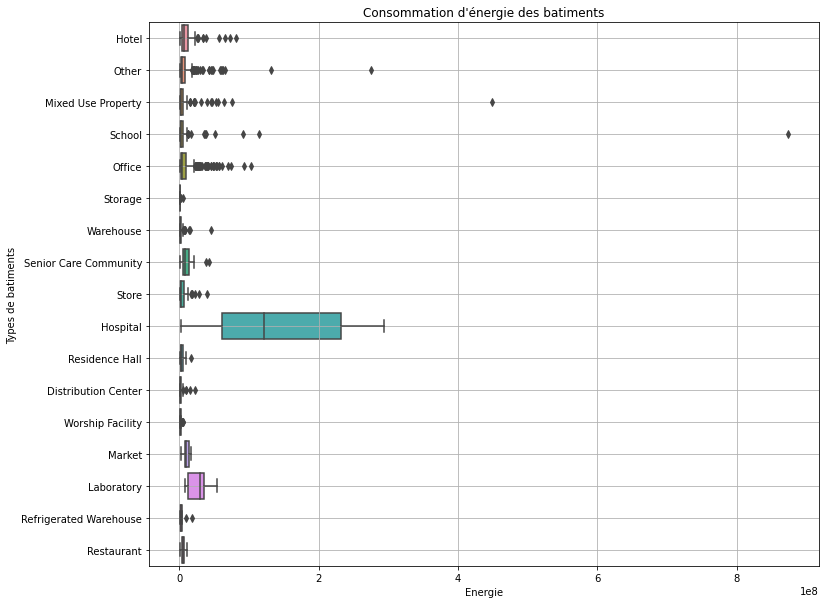

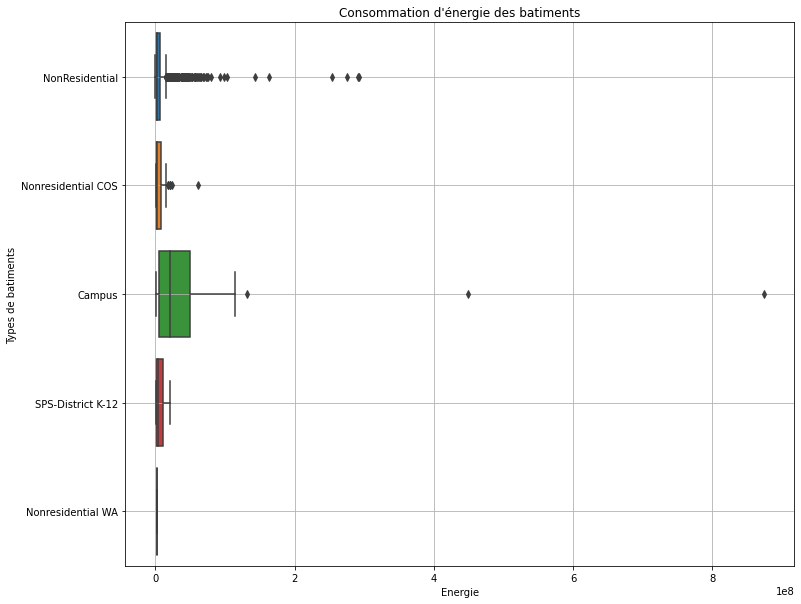

In [10]:
display(Data_frame.PrimaryPropertyType.unique())
# On renomme pour facilité la détection
Data_frame.PrimaryPropertyType.replace ({
     'K-12 School' : "School",
     'College/University' : "School",
     'Small- and Mid-Sized Office' : "Office",
     'Self-Storage Facility\n' : "Storage",
     'Large Office' : "Office",
     'Retail Store' : "Store",
     'Medical Office' : "Office",
     'Supermarket/Grocery Store' : "Market",
     'Self-Storage Facility' : "Storage",
     'Restaurant\n' : "Restaurant",
     'Supermarket/Grocery Store' : "Market",
     'University' : "School",
    'Supermarket / Grocery Store' : 'Market'
             }, inplace= True)

plt.figure(figsize=(12,10))
sns.boxplot(x="SiteEnergyUse(kBtu)", y="PrimaryPropertyType", data=Data_frame)
#sns.swarmplot(x="SiteEnergyUse(kBtu)", y="PrimaryPropertyType", data=Data_frame, color=".25")
## swarmplot non activé car impossible à lire
plt.xlabel("Energie")
plt.ylabel("Types de batiments")
plt.title("Consommation d'énergie des batiments")
plt.grid(True)
plt.show()

# A controler l'outlier pour Mixed Use Property, et University.

## L'hopital est le type de batiment qui consomme le plus.

plt.figure(figsize=(12,10))
sns.boxplot(x="SiteEnergyUse(kBtu)", y="BuildingType", data=Data_frame)
#sns.swarmplot(x="SiteEnergyUse(kBtu)", y="PrimaryPropertyType", data=Data_frame, color=".25")
## swarmplot non activé car impossible à lire
plt.xlabel("Energie")
plt.ylabel("Types de batiments")
plt.title("Consommation d'énergie des batiments")
plt.grid(True)
plt.show()

# Ici, on peut voir que le campus et les Non Residential sont ceux qui consomme le plus.

On voit une trés grande partie des hopitaux qui consomme énormément, ainsi que les campus.

### Emission de Gaz des batiments et type de batiments:

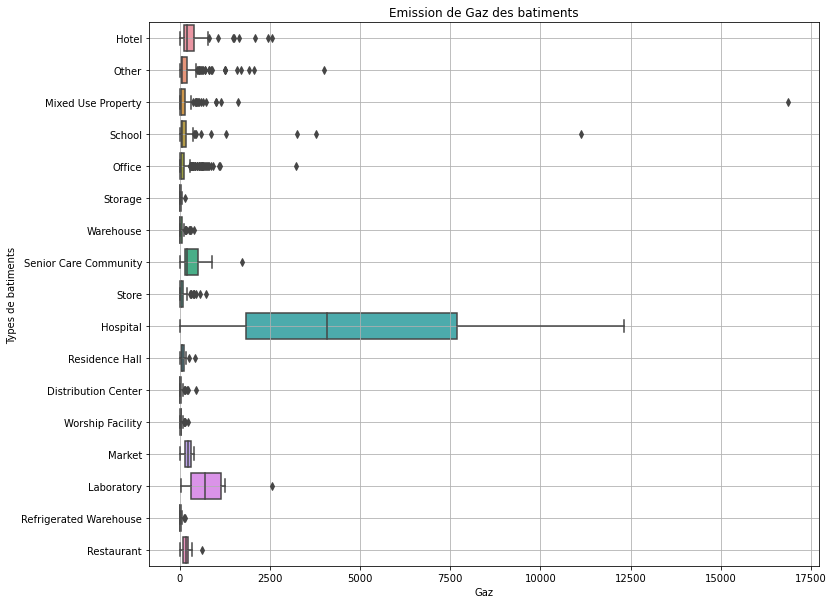

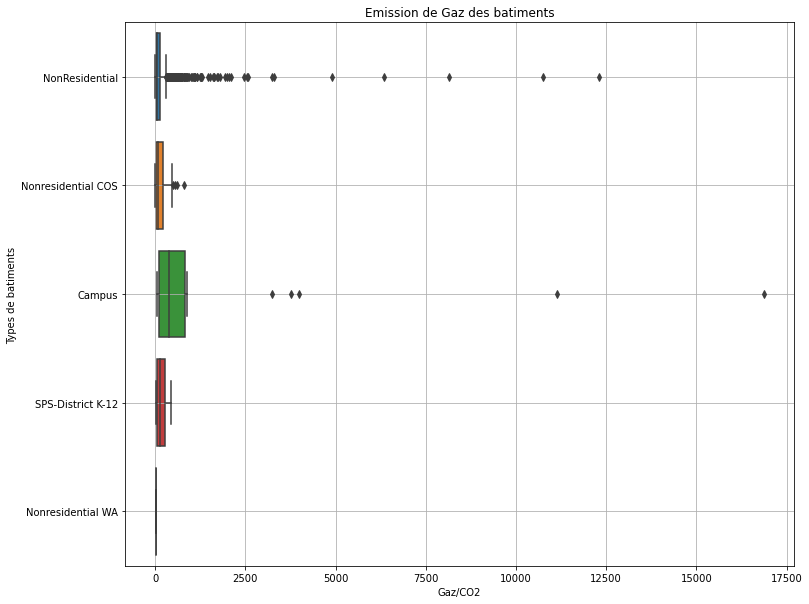

In [11]:
plt.figure(figsize=(12,10))
sns.boxplot(x='TotalGHGEmissions', y="PrimaryPropertyType", data=Data_frame)
#sns.swarmplot(x="SiteEnergyUse(kBtu)", y="PrimaryPropertyType", data=Data_frame, color=".25")
## swarmplot non activé car impossible à lire
plt.xlabel("Gaz")
plt.ylabel("Types de batiments")
plt.title("Emission de Gaz des batiments")
plt.grid(True)
plt.show()

# On a une fois de plus l'université le Mixed Used Property en outlier.

# L'hopital consomme beaucoup de gaz.

plt.figure(figsize=(12,10))
sns.boxplot(x='TotalGHGEmissions', y="BuildingType", data=Data_frame)
#sns.swarmplot(x="SiteEnergyUse(kBtu)", y="PrimaryPropertyType", data=Data_frame, color=".25")
## swarmplot non activé car impossible à lire
plt.xlabel("Gaz/CO2")
plt.ylabel("Types de batiments")
plt.title("Emission de Gaz des batiments")
plt.grid(True)
plt.show()

# Campus et Non Residential qui consomme le plus.

On voit une trés grande partie des hopitaux qui consomme énormément, ainsi que les campus.

### Affichage poussée de primary property type :

#### Pourcentage de Gaz et d'énergie par type de batiments :

In [12]:
# visu du df brut
df_PropertyType = pd.pivot_table(Data_frame, values=['TotalGHGEmissions',"SiteEnergyUse(kBtu)","YearBuilt","BuildingType",'Neighborhood','PropertyName'], index=["PrimaryPropertyType"],
                        aggfunc=np.sum)
df_PropertyType = df_PropertyType.reset_index()
df_PropertyType['Energy_%'] = round((df_PropertyType['SiteEnergyUse(kBtu)'] / df_PropertyType['SiteEnergyUse(kBtu)'].sum())*100,2)
df_PropertyType['Gaz_%'] = round((df_PropertyType['TotalGHGEmissions'] / df_PropertyType['TotalGHGEmissions'].sum())*100,2)

#visu du df gaz en % ascending False 
display(df_PropertyType.sort_values("Energy_%", ascending = False))
## Conso gaz et électricité plutôt similaire

,PrimaryPropertyType,SiteEnergyUse(kBtu),TotalGHGEmissions,YearBuilt,Energy_%,Gaz_%
6,Office,4.148692e+09,56483.66,954046,30.77,19.10
7,Other,2.261445e+09,48482.33,479105,16.77,16.39
11,School,1.468630e+09,27946.98,144701,10.89,9.45
1,Hospital,1.415470e+09,50529.63,19751,10.50,17.08
5,Mixed Use Property,1.174772e+09,31190.03,174359,8.71,10.55
2,Hotel,9.068579e+08,29144.68,147409,6.72,9.85
14,Store,4.217251e+08,8010.70,166444,3.13,2.71
4,Market,4.039148e+08,8903.75,79339,3.00,3.01
15,Warehouse,3.657513e+08,7932.51,362530,2.71,2.68
3,Laboratory,2.629313e+08,8494.24,19725,1.95,2.87


#### Affichage détaillée :

---------------------------------------------------------

Affichage de l'électricité consommé par type de batiments :

---------------------------------------------------------



PrimaryPropertyType
Hospital                  1.415470e+08
Laboratory                2.629313e+07
School                    1.984635e+07
Mixed Use Property        1.319969e+07
Hotel                     1.209144e+07
Senior Care Community     1.151729e+07
Market                    1.009787e+07
Other                     9.268217e+06
Office                    8.536404e+06
Restaurant                5.263898e+06
Store                     4.961472e+06
Residence Hall            3.810723e+06
Refrigerated Warehouse    3.719428e+06
Distribution Center       2.405360e+06
Warehouse                 1.977034e+06
Worship Facility          1.202896e+06
Storage                   9.321726e+05
Name: SiteEnergyUse(kBtu), dtype: float64

---------------------------------------------------------

Affichage des Emissions de CO2 par type de batiments :

---------------------------------------------------------


PrimaryPropertyType
Hospital                  5052.963000
Laboratory                 849.424000
Hotel                      388.595733
School                     377.661892
Senior Care Community      371.899500
Mixed Use Property         350.449775
Market                     222.593750
Other                      198.698074
Restaurant                 192.514167
Office                     116.221523
Residence Hall             101.265714
Store                       94.243529
Distribution Center         50.225660
Worship Facility            43.382609
Warehouse                   42.878432
Refrigerated Warehouse      37.614167
Storage                     24.098929
Name: TotalGHGEmissions, dtype: float64


---------------------------------------------------------

Affichage du nombre de batiment :

---------------------------------------------------------


PrimaryPropertyType
Distribution Center        53
Hospital                   10
Hotel                      75
Laboratory                 10
Market                     40
Mixed Use Property         89
Office                    486
Other                     244
Refrigerated Warehouse     12
Residence Hall             21
Restaurant                 12
School                     74
Senior Care Community      20
Storage                    28
Store                      85
Warehouse                 185
Worship Facility           69
Name: PrimaryPropertyType, dtype: int64

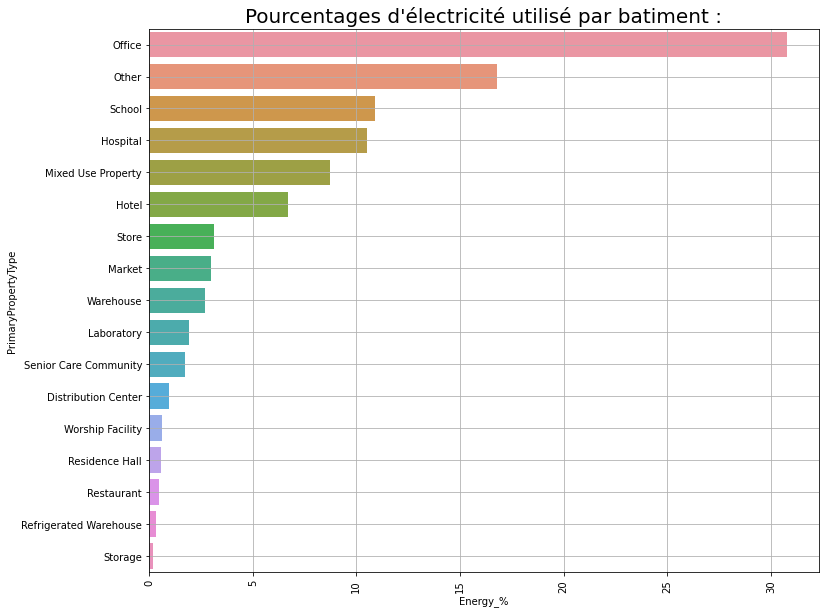

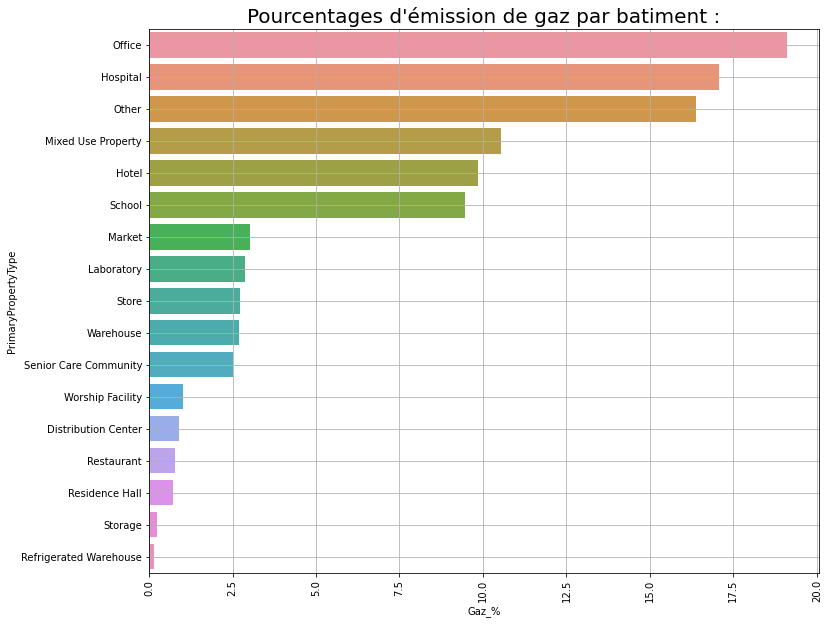

In [13]:
df_PropertyType_elec = df_PropertyType[['PrimaryPropertyType','Energy_%']]
df_PropertyType_elec = df_PropertyType_elec.sort_values("Energy_%", ascending = False)
df_PropertyType_gaz = df_PropertyType[['PrimaryPropertyType','Gaz_%']]
df_PropertyType_gaz = df_PropertyType_gaz.sort_values("Gaz_%", ascending = False)

# visu élec par batiment
plt.figure(figsize=(12,10))
plt.title("Pourcentages d'électricité utilisé par batiment :" , size = 20)
sns.barplot(x="Energy_%", y="PrimaryPropertyType", data=df_PropertyType_elec)
plt.grid(True)
plt.xticks(rotation=90)

# Visu émission par batiment
plt.figure(figsize=(12,10))
plt.title("Pourcentages d'émission de gaz par batiment :" , size = 20)
sns.barplot(x="Gaz_%", y="PrimaryPropertyType", data=df_PropertyType_gaz)
plt.grid(True)
plt.xticks(rotation=90)
print("---------------------------------------------------------")
print("")
print("Affichage de l'électricité consommé par type de batiments :")
print("")
print("---------------------------------------------------------")
print("")
display(Data_frame.groupby("PrimaryPropertyType")["SiteEnergyUse(kBtu)"].mean().sort_values(ascending=False))
# Pour avoir la conso électrique
print("---------------------------------------------------------")
print("")
print("Affichage des Emissions de CO2 par type de batiments :")
print("")
print("---------------------------------------------------------")
display(Data_frame.groupby("PrimaryPropertyType")["TotalGHGEmissions"].mean().sort_values(ascending=False))
# Pour avoir les émissions de Gaz
print("")
print("---------------------------------------------------------")
print("")
print("Affichage du nombre de batiment :")
print("")
print("---------------------------------------------------------")
display(Data_frame.groupby("PrimaryPropertyType")["PrimaryPropertyType"].count())


#On peut voir ici que les Hopitaux consomment le plus et de trés loin alors qu'ils ne sont pas nombreux.

## On peut également voir que plus un batiment consomme de l'électricité plus son emission sera important.

On remarque que les Hopitaux bien que peu nombreux, consomme énormément et ont un taux d'émission de CO2 trés élevé.

10 Hopitaux émettent quasiment autant que 486 bureaux

### Affichage poussée pour les hopitaux (potentiel Outlier) :

In [14]:
df_hospital = pd.pivot_table(Data_frame, values=['TotalGHGEmissions',"SiteEnergyUse(kBtu)","YearBuilt","BuildingType",'Neighborhood'], index=["PrimaryPropertyType",'PropertyName'],
                        aggfunc=np.sum)

df_hospital = df_hospital.reset_index()
df_hospital = Data_frame[Data_frame['PrimaryPropertyType']=='Hospital']
df_hospital['Energy_%'] = round((df_hospital['SiteEnergyUse(kBtu)'] / df_hospital['SiteEnergyUse(kBtu)'].sum())*100,2)
df_hospital['Gaz_%'] = round((df_hospital['TotalGHGEmissions'] / df_hospital['TotalGHGEmissions'].sum())*100,2)
df_hospital

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,Energy_%,Gaz_%
98,147,2016,NonResidential,Hospital,Swedish Ballard,5300 Tallman Ave NW,Seattle,WA,98107.0,2767703875,...,3.285351e+05,32853512.0,False,NaN,Compliant,NaN,1990.50,6.98,4.81,3.94
124,198,2016,NonResidential,Hospital,Seattle Children's Hospital Main Campus,4800 Sand Point Way NE,Seattle,WA,98105.0,2982800005,...,1.381912e+06,138191238.0,False,NaN,Compliant,NaN,8145.52,9.27,17.93,16.12
167,268,2016,NonResidential,Hospital,Swedish Cherry Hill,500 17th Ave,Seattle,WA,98122.0,7942600331,...,8.466809e+05,84668094.0,False,NaN,Compliant,NaN,4906.33,8.21,10.13,9.71
170,276,2016,NonResidential,Hospital,Harborview Medical Center,325 9th Ave.,Seattle,WA,98104.0,8590900220,...,1.832129e+04,1832129.0,False,NaN,Compliant,NaN,10734.57,9.26,20.71,21.24
355,498,2016,NonResidential,Hospital,SCCA,825 Eastlake Ave E,Seattle,WA,98109.0,1361300055,...,1.592773e+05,15927728.0,False,NaN,Compliant,NaN,1032.63,2.94,3.02,2.04
618,828,2016,NonResidential,Hospital,Swedish First Hill,747 Broadway,Seattle,WA,98122.0,1978201096,...,1.731612e+05,17316120.0,False,NaN,Compliant,NaN,12307.16,6.97,20.60,24.36
1672,23071,2016,NonResidential,Hospital,Main Hospital - All Wings,Facilities Management MS: B-120,Seattle,WA,98133.0,3026049130,...,5.609661e+05,56096612.0,False,NaN,Compliant,NaN,3278.11,7.89,6.99,6.49
2482,25772,2016,NonResidential,Hospital,Park West Skilled Nursing,1703 California Ave SW,Seattle,WA,98116.0,9274200430,...,0.000000e+00,0.0,False,NaN,Compliant,NaN,14.21,0.26,0.14,0.03
3187,49732,2016,NonResidential,Hospital,Seattle Children's Hospital Building Hope,4500 40th Ave NE,Seattle,WA,98145.0,1025049265,...,3.006132e+05,30061325.0,False,NaN,Compliant,NaN,1789.69,5.42,4.08,3.54
3264,49940,2016,NonResidential,Hospital,Virginia Mason Medical Center - 2149,925 Seneca St.,Seattle,WA,98101.0,1979200210,...,0.000000e+00,0.0,False,NaN,Compliant,NaN,6330.91,16.91,11.58,12.53


#### Affichage détaillée :

---------------------------------------------------------

Affichage de l'électricité consommé par type de batiments :

---------------------------------------------------------



PropertyName
Harborview Medical Center                    2.930908e+08
Swedish First Hill                           2.916144e+08
Seattle Children's Hospital Main Campus      2.538325e+08
Virginia Mason Medical Center - 2149         1.639460e+08
Swedish Cherry Hill                          1.434230e+08
Main Hospital - All Wings                    9.896078e+07
Swedish Ballard                              6.809073e+07
Seattle Children's Hospital Building Hope    5.776441e+07
SCCA                                         4.270962e+07
Park West Skilled Nursing                    2.037721e+06
Name: SiteEnergyUse(kBtu), dtype: float64

---------------------------------------------------------

Affichage des Emissions de CO2 par type de batiments :

---------------------------------------------------------


PropertyName
Swedish First Hill                           12307.16
Harborview Medical Center                    10734.57
Seattle Children's Hospital Main Campus       8145.52
Virginia Mason Medical Center - 2149          6330.91
Swedish Cherry Hill                           4906.33
Main Hospital - All Wings                     3278.11
Swedish Ballard                               1990.50
Seattle Children's Hospital Building Hope     1789.69
SCCA                                          1032.63
Park West Skilled Nursing                       14.21
Name: TotalGHGEmissions, dtype: float64

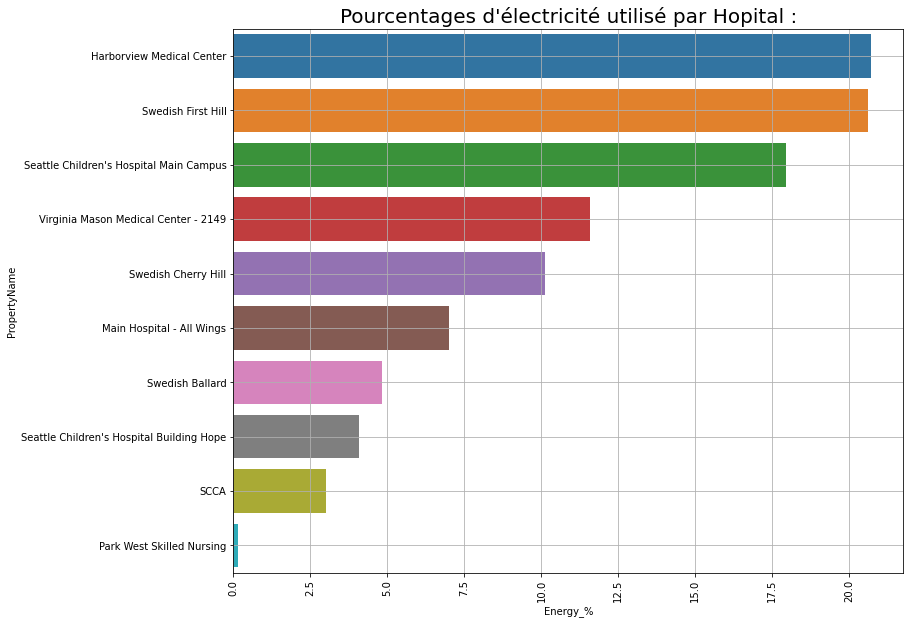

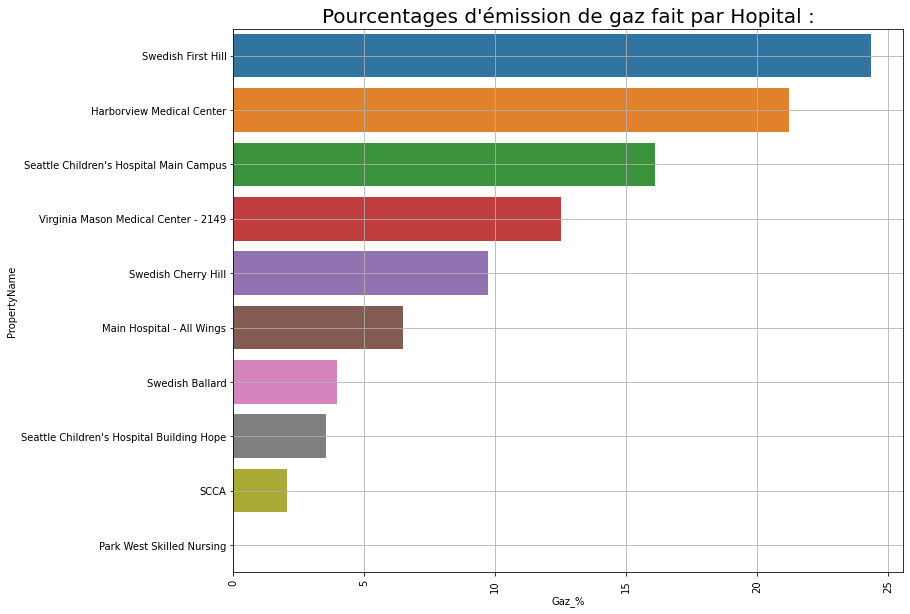

In [15]:
df_hospital_elec = df_hospital[['PropertyName','Energy_%']]
df_hospital_elec = df_hospital_elec.sort_values("Energy_%", ascending = False)
df_hospital_gaz = df_hospital[['PropertyName','Gaz_%']]
df_hospital_gaz = df_hospital_gaz.sort_values("Gaz_%", ascending = False)

# Visu élec par batiment :
plt.figure(figsize=(12,10))
plt.title("Pourcentages d'électricité utilisé par Hopital :" , size = 20)
sns.barplot(x="Energy_%", y="PropertyName", data=df_hospital_elec)
plt.grid(True)
plt.xticks(rotation=90)

# Visu émission par batiment :
plt.figure(figsize=(12,10))
plt.title("Pourcentages d'émission de gaz fait par Hopital :" , size = 20)
sns.barplot(x="Gaz_%", y="PropertyName", data=df_hospital_gaz)
plt.grid(True)
plt.xticks(rotation=90)
print("---------------------------------------------------------")
print("")
print("Affichage de l'électricité consommé par type de batiments :")
print("")
print("---------------------------------------------------------")
print("")
display(df_hospital.groupby("PropertyName")["SiteEnergyUse(kBtu)"].mean().sort_values(ascending=False).head(50))
# Pour avoir la conso électrique
print("---------------------------------------------------------")
print("")
print("Affichage des Emissions de CO2 par type de batiments :")
print("")
print("---------------------------------------------------------")
display(df_hospital.groupby("PropertyName")["TotalGHGEmissions"].mean().sort_values(ascending=False).head(50))
# Pour avoir les émissions de Gaz

### Suppression de quelques données inutiles :

In [16]:
Data_frame.drop(['TaxParcelIdentificationNumber', 'CouncilDistrictCode',
                 'DefaultData','Address','City', 'State','Comments','Outlier','ComplianceStatus'], axis=1, inplace=True)
# Suppression de certaines colonnes peu interessantes 'TaxParcelIdentificationNumber', 'CouncilDistrictCode',
# 'Address','City', 'State' ont étés supprimés car nous sommes à Seattles et nous n'avons pas besoin de ses données
## 'Comments','Outlier' pas interessantes car trop peu d'interet dans notre analyse.
### ENERGYSTARScore,SecondLargestPropertyUseTypeGFA,SecondLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType 
### Ces données doivent être gardés elles sont importantes pour le feature engineering
display(Data_frame.head())

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,ZipCode,Neighborhood,Latitude,Longitude,YearBuilt,...,SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,98101.0,DOWNTOWN,47.61220,-122.33799,1927,...,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,98101.0,DOWNTOWN,47.61317,-122.33393,1996,...,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,98101.0,DOWNTOWN,47.61393,-122.33810,1969,...,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,98101.0,DOWNTOWN,47.61412,-122.33664,1926,...,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),98121.0,DOWNTOWN,47.61375,-122.34047,1980,...,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,505.01,2.88


9 colonnes ont été supprimés car peu utiles, ou elles ont déjà été utilisés pour l'analyse.

### Renommage des données :

#### Pour les quartiers :

In [17]:
# On renomme les quartiers :
display(Data_frame.Neighborhood.unique())
Data_frame.Neighborhood.replace ({"DELRIDGE NEIGHBORHOODS" : "DELRIDGE",
                                  "Ballard" : "BALLARD",
                                  "Delridge": "DELRIDGE",
                                  "North" : "NORTH",
                                  "Northwest": "NORTHWEST",
                                  "Central": "CENTRAL",
             }, inplace= True)
display(Data_frame.Neighborhood.unique())

## fonction .UPPER() utilisable 

array(['DOWNTOWN', 'NORTHEAST', 'EAST', 'LAKE UNION', 'GREATER DUWAMISH',
       'MAGNOLIA / QUEEN ANNE', 'BALLARD', 'NORTHWEST', 'CENTRAL',
       'SOUTHWEST', 'SOUTHEAST', 'DELRIDGE', 'NORTH', 'North', 'Delridge',
       'Ballard', 'Northwest', 'Central', 'DELRIDGE NEIGHBORHOODS'],
      dtype=object)

array(['DOWNTOWN', 'NORTHEAST', 'EAST', 'LAKE UNION', 'GREATER DUWAMISH',
       'MAGNOLIA / QUEEN ANNE', 'BALLARD', 'NORTHWEST', 'CENTRAL',
       'SOUTHWEST', 'SOUTHEAST', 'DELRIDGE', 'NORTH'], dtype=object)

In [18]:
## Vérification de PropertyUseTypes : ALL ,Largest, Second, Third :

# Primary :
Outlier_largest = Data_frame[Data_frame["LargestPropertyUseTypeGFA"] > Data_frame["PropertyGFATotal"]]
display(Outlier_largest[["LargestPropertyUseTypeGFA","PropertyGFATotal","SecondLargestPropertyUseTypeGFA",'ThirdLargestPropertyUseTypeGFA']])
print("-----------------------------------------------------------------------------")
print(" Il y a ",Outlier_largest['LargestPropertyUseTypeGFA'].count().sum(), " Outliers affichés pour le Largest ")
print("-----------------------------------------------------------------------------")
Outlier_largest_0 = Data_frame[Data_frame["LargestPropertyUseTypeGFA"] < 0]
display(Outlier_largest_0)
print("-----------------------------------------------------------------------------")
print(" Il y a ",Outlier_largest_0['LargestPropertyUseTypeGFA'].count().sum(), " Outliers affichés pour le Largest ")
print("-----------------------------------------------------------------------------")


,LargestPropertyUseTypeGFA,PropertyGFATotal,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA
11,336640.0,333176,NaN,NaN
35,757027.0,494835,639931.0,459748.0
43,348630.0,332210,NaN,NaN
59,296313.0,217603,0.0,NaN
66,72072.0,58320,NaN,NaN
...,...,...,...,...
3294,83600.0,33648,39000.0,NaN
3319,159500.0,144614,NaN,NaN
3322,202171.0,108036,108036.0,NaN
3347,45728.0,45000,0.0,NaN


-----------------------------------------------------------------------------
 Il y a  180  Outliers affichés pour le Largest 
-----------------------------------------------------------------------------


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,ZipCode,Neighborhood,Latitude,Longitude,YearBuilt,...,SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity


-----------------------------------------------------------------------------
 Il y a  0  Outliers affichés pour le Largest 
-----------------------------------------------------------------------------


### Contrôle des surfaces :

#### Primary :

In [19]:
# Primary :
Outlier_largest = Data_frame[Data_frame["LargestPropertyUseTypeGFA"] > Data_frame["PropertyGFATotal"]]
display(Outlier_largest[["LargestPropertyUseTypeGFA","PropertyGFATotal","SecondLargestPropertyUseTypeGFA",'ThirdLargestPropertyUseTypeGFA']])

,LargestPropertyUseTypeGFA,PropertyGFATotal,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA
11,336640.0,333176,NaN,NaN
35,757027.0,494835,639931.0,459748.0
43,348630.0,332210,NaN,NaN
59,296313.0,217603,0.0,NaN
66,72072.0,58320,NaN,NaN
...,...,...,...,...
3294,83600.0,33648,39000.0,NaN
3319,159500.0,144614,NaN,NaN
3322,202171.0,108036,108036.0,NaN
3347,45728.0,45000,0.0,NaN


#### Second :

In [20]:
# Second :
Outlier_largest_2 = Data_frame[Data_frame["SecondLargestPropertyUseTypeGFA"] > Data_frame["PropertyGFATotal"]]
display(Outlier_largest_2)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,ZipCode,Neighborhood,Latitude,Longitude,YearBuilt,...,SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
35,43,2016,Campus,Mixed Use Property,Plant 2 Site,98108.0,GREATER DUWAMISH,47.53493,-122.31788,1992,...,400.299988,4.483853e+08,4.716139e+08,0.0,4.410208e+07,150476283.0,2.979090e+06,297909000.0,16870.98,34.09
3132,40034,2016,NonResidential,Office,Sandpoint #29,98115.0,NORTHEAST,47.68254,-122.26299,1960,...,233.300003,3.947209e+06,4.292216e+06,0.0,4.099035e+05,1398591.0,2.548619e+04,2548619.0,145.11,6.62
3294,50002,2016,NonResidential,Other,Audi Seattle UVA Bldg,98105.0,NORTHEAST,47.66414,-122.31664,2014,...,112.699997,1.399582e+06,1.399582e+06,0.0,4.101939e+05,1399582.0,0.000000e+00,0.0,9.76,0.29


#### Third :

In [21]:
# Third :
Outlier_largest_3 = Data_frame[Data_frame["ThirdLargestPropertyUseTypeGFA"] > Data_frame["PropertyGFATotal"]]
display(Outlier_largest_3)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,ZipCode,Neighborhood,Latitude,Longitude,YearBuilt,...,SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity


#### Utilisation de la fonction Mask pour réduire le nombre d'erreur :

In [22]:
Data_frame['PropertyGFATotal'] = (Data_frame['PropertyGFATotal'].mask(Data_frame['LargestPropertyUseTypeGFA'] + Data_frame['SecondLargestPropertyUseTypeGFA'] + Data_frame['ThirdLargestPropertyUseTypeGFA'] > Data_frame['PropertyGFATotal'] , (Data_frame['LargestPropertyUseTypeGFA'] + Data_frame['SecondLargestPropertyUseTypeGFA'] + Data_frame['ThirdLargestPropertyUseTypeGFA']))).fillna(0)
# On ajoute un fillna(0), car si on n'a pas de données on peut considérer qu'il n'y pas d'autres batiments.

In [23]:
df_mask = Data_frame[['LargestPropertyUseTypeGFA','SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseTypeGFA','PropertyGFATotal' ]].fillna(0)
df_mask['PropertyGFATotal_mask'] = df_mask['LargestPropertyUseTypeGFA'] + df_mask['SecondLargestPropertyUseTypeGFA'] + df_mask['ThirdLargestPropertyUseTypeGFA']

In [24]:
df_out  = df_mask[df_mask["LargestPropertyUseTypeGFA"] > df_mask["PropertyGFATotal_mask"]]
df_out[["LargestPropertyUseTypeGFA","PropertyGFATotal_mask"]]
# Les erreurs ont étés rectifiés 

,LargestPropertyUseTypeGFA,PropertyGFATotal_mask


#### Création d'une colonne Real_GFA pour éviter les NaN / erreur possible :

In [25]:
Data_frame['LargestPropertyUseTypeGFA'] = Data_frame['LargestPropertyUseTypeGFA'].fillna(0)
Data_frame['SecondLargestPropertyUseTypeGFA'] = Data_frame['SecondLargestPropertyUseTypeGFA'].fillna(0)
Data_frame['ThirdLargestPropertyUseTypeGFA'] = Data_frame['ThirdLargestPropertyUseTypeGFA'].fillna(0)
Data_frame['PropertyGFATotal'] = Data_frame['PropertyGFATotal'].fillna(0)

Data_frame['Real_GFA'] = round(Data_frame['LargestPropertyUseTypeGFA'] + Data_frame['SecondLargestPropertyUseTypeGFA'] +Data_frame['ThirdLargestPropertyUseTypeGFA'])
display(Data_frame)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,ZipCode,Neighborhood,Latitude,Longitude,YearBuilt,...,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Real_GFA
0,1,2016,NonResidential,Hotel,Mayflower park hotel,98101.0,DOWNTOWN,47.61220,-122.33799,1927,...,7.226362e+06,7.456910e+06,2003882.00,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,249.98,2.83,88434.0
1,2,2016,NonResidential,Hotel,Paramount Hotel,98101.0,DOWNTOWN,47.61317,-122.33393,1996,...,8.387933e+06,8.664479e+06,0.00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,295.86,2.86,103566.0
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,98101.0,DOWNTOWN,47.61393,-122.33810,1969,...,7.258702e+07,7.393711e+07,21566554.00,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,2089.28,2.19,756493.0
3,5,2016,NonResidential,Hotel,HOTEL MAX,98101.0,DOWNTOWN,47.61412,-122.33664,1926,...,6.794584e+06,6.946800e+06,2214446.25,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,286.43,4.67,61320.0
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),98121.0,DOWNTOWN,47.61375,-122.34047,1980,...,1.417261e+07,1.465650e+07,0.00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,505.01,2.88,191454.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3370,50221,2016,Nonresidential COS,Other,High Point Community Center,NaN,DELRIDGE,47.54067,-122.37441,1982,...,9.320821e+05,1.025432e+06,0.00,1.853347e+05,6.323620e+05,2997.199951,2.997200e+05,20.33,1.11,18261.0
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,NaN,DOWNTOWN,47.59625,-122.32283,2004,...,9.502762e+05,1.053706e+06,0.00,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,32.17,2.01,16000.0
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,NaN,MAGNOLIA / QUEEN ANNE,47.63644,-122.35784,1974,...,5.765898e+06,6.053764e+06,0.00,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,223.54,16.99,13157.0
3374,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,NaN,GREATER DUWAMISH,47.52832,-122.32431,1989,...,7.194712e+05,7.828413e+05,0.00,1.022480e+05,3.488702e+05,3706.010010,3.706010e+05,22.11,1.57,13586.0


On pourrait créer un log dessus pour comparer les données.

## Visualisation Folium pour représenter la ville de Seattle et les quartiers :

### Création des données de latitudes/longitudes moyennes pour l'analyse :

In [26]:
# Les Latitudes et les Longitudes moyennes pour Folium :
Data_frame['Latitude'] =Data_frame['Latitude'].astype('float')
Data_frame['Longitude']=Data_frame['Longitude'].astype('float')

print('La latitude moyenne est de :',Data_frame['Latitude'].mean())  ## INUTILE
print('--------------------------------------------------')
print('La Longitude moyenne est de :',Data_frame['Longitude'].mean()) ## INUTILE

La latitude moyenne est de : 47.61638702147395
--------------------------------------------------
La Longitude moyenne est de : -122.33348027805698


### Visualisation de la map :

In [27]:
import folium
from folium import plugins
import ipywidgets
import geocoder
import geopy

FOLIUM = pd.pivot_table(Data_frame, values=['Latitude','Longitude','TotalGHGEmissions',"SiteEnergyUse(kBtu)"], index=['Neighborhood'],
                        aggfunc=np.mean)
FOLIUM = FOLIUM.reset_index()
FOLIUM['Energy'] = round((FOLIUM['SiteEnergyUse(kBtu)'] / FOLIUM['SiteEnergyUse(kBtu)'].sum())*100,2)
FOLIUM['Gaz'] = round((FOLIUM['TotalGHGEmissions'] / FOLIUM['TotalGHGEmissions'].sum())*100,2)
FOLIUM = FOLIUM.sort_values(by="Energy", ascending=False)
display(FOLIUM)

# Make an empty map
n = folium.Map(location=[47.61599786981303, -122.33305091244667], zoom_start=12, width=1000, height=600, control_scale=True)

# add marker one by one on the map
for i in range(0,len(FOLIUM)):
   folium.Marker(
      location=[FOLIUM.iloc[i]['Latitude'], FOLIUM.iloc[i]['Longitude']],
      popup=FOLIUM.iloc[i][['Energy','Gaz','Neighborhood','Latitude','Longitude']],
   ).add_to(n)
n

,Neighborhood,Latitude,Longitude,SiteEnergyUse(kBtu),TotalGHGEmissions,Energy,Gaz
9,NORTHEAST,47.666360,-122.302853,1.571464e+07,288.492018,15.44,11.99
4,EAST,47.614455,-122.319998,1.516343e+07,510.463125,14.90,21.22
3,DOWNTOWN,47.607851,-122.336197,1.229166e+07,217.657672,12.08,9.05
6,LAKE UNION,47.634520,-122.337937,1.046042e+07,202.375362,10.28,8.41
1,CENTRAL,47.607296,-122.305501,6.883371e+06,184.216444,6.76,7.66
10,NORTHWEST,47.708394,-122.343052,6.165606e+06,156.444744,6.06,6.50
7,MAGNOLIA / QUEEN ANNE,47.635894,-122.362428,5.965968e+06,132.929441,5.86,5.53
5,GREATER DUWAMISH,47.564634,-122.325643,5.370826e+06,123.186523,5.28,5.12
12,SOUTHWEST,47.560704,-122.382786,5.241634e+06,163.897419,5.15,6.81
2,DELRIDGE,47.541531,-122.356121,5.141605e+06,104.663415,5.05,4.35


#### Pie de visualisation des quartiers :

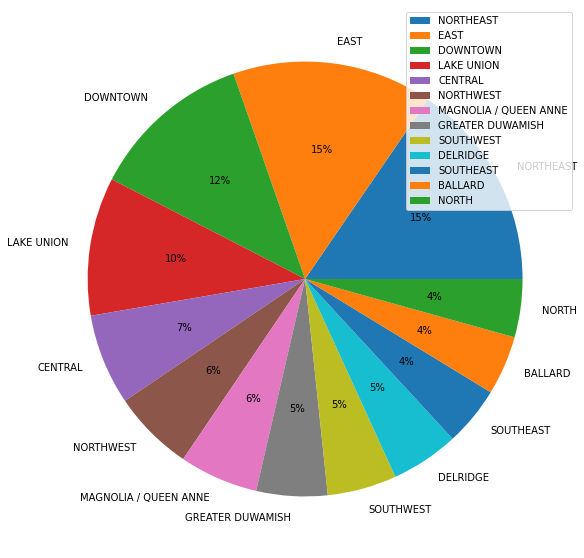

--------------------------------------------------


,Neighborhood,Energy
9,NORTHEAST,15.44
4,EAST,14.90
3,DOWNTOWN,12.08
6,LAKE UNION,10.28
1,CENTRAL,6.76
10,NORTHWEST,6.06
7,MAGNOLIA / QUEEN ANNE,5.86
5,GREATER DUWAMISH,5.28
12,SOUTHWEST,5.15
2,DELRIDGE,5.05


--------------------------------------------------


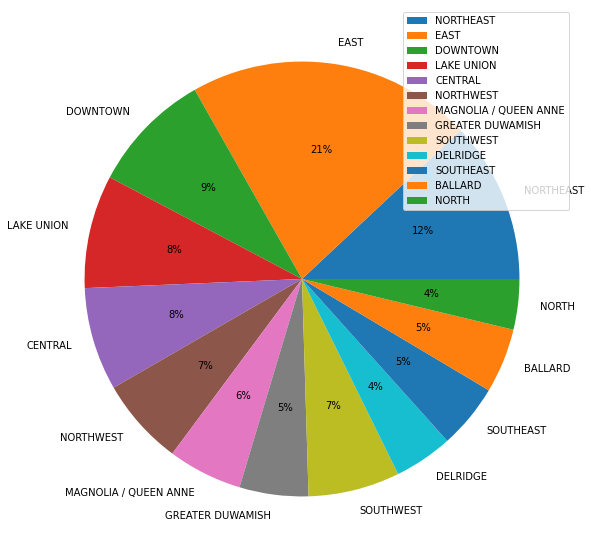

--------------------------------------------------


,Neighborhood,Gaz
4,EAST,21.22
9,NORTHEAST,11.99
3,DOWNTOWN,9.05
6,LAKE UNION,8.41
1,CENTRAL,7.66
12,SOUTHWEST,6.81
10,NORTHWEST,6.50
7,MAGNOLIA / QUEEN ANNE,5.53
5,GREATER DUWAMISH,5.12
11,SOUTHEAST,4.81


In [28]:
# Visu graphique de l'énergie par quartier :
#define data
data = FOLIUM['Energy']
labels = FOLIUM['Neighborhood']
#define Seaborn color palette to use
colors = sns.color_palette()
#create pie chart
plt.figure(figsize=(12,10))
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.legend(loc ="best")
plt.show()

print('--------------------------------------------------')

#visu DF
FOLIUM_elec = FOLIUM[['Neighborhood','Energy']].sort_values("Energy", ascending = False)
display(FOLIUM_elec)

print('--------------------------------------------------')

# Visu graphique des emissions de gaz par quartier :
#define data
data = FOLIUM['Gaz']
labels = FOLIUM['Neighborhood']
#define Seaborn color palette to use
colors = sns.color_palette()
#create pie chart
plt.figure(figsize=(12,10))
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.legend(loc ="best")
plt.show()

print('--------------------------------------------------')
# Visu DF
FOLIUM_Gaz = FOLIUM[['Neighborhood','Gaz']].sort_values("Gaz", ascending = False)
display(FOLIUM_Gaz)

# __Features Engineering :__

A partir d'ici nous allons crée des nouvelles colonnes à partir de données existantes, qui nous permettront de supprimer d'autres colonnes par la suite tout en permettant d'optimiser les résultats.

### Age du batiment :

L'âge médian des bâtiments est de 51 ans.


<AxesSubplot:xlabel='Age_du_batiment', ylabel='Density'>

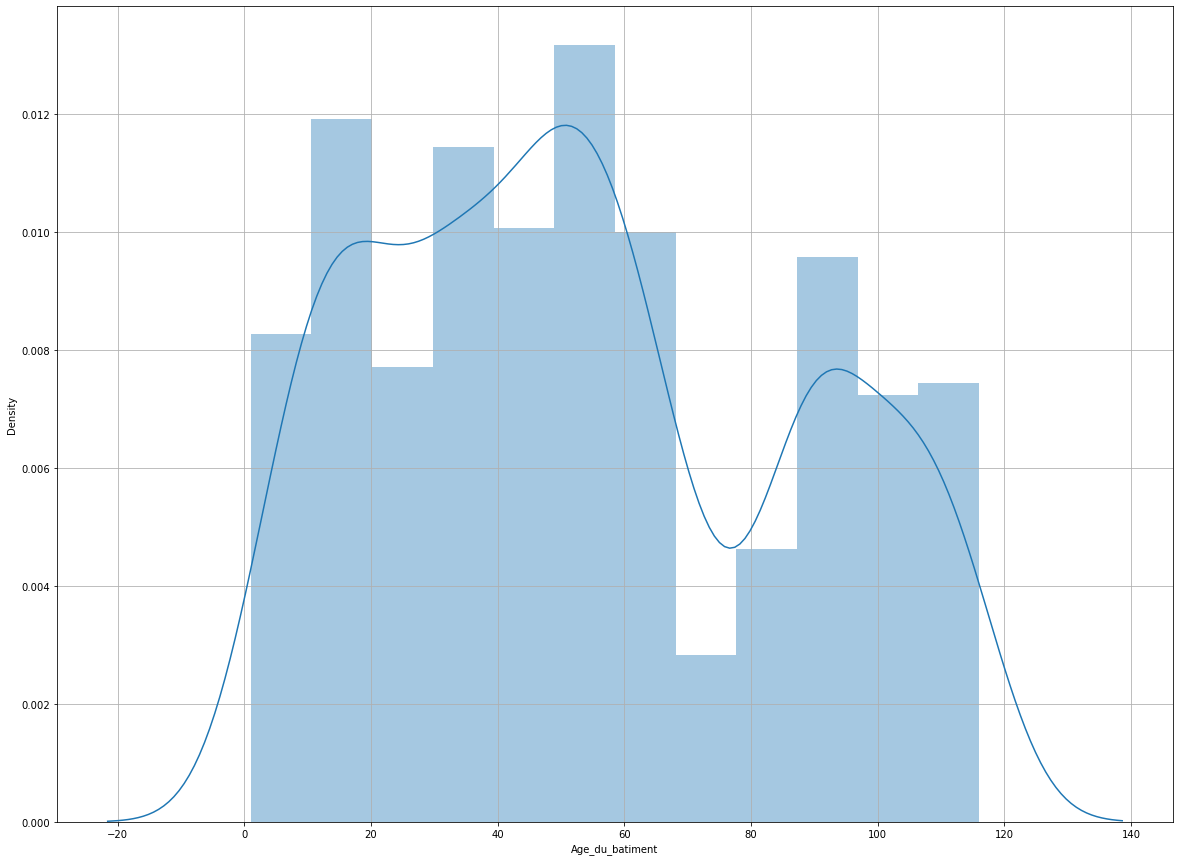

In [29]:
# L'Age du batiment permettra d'estimer la connsommation en fonction de l'ancienneté du batiment (travaux à prévoir etc etc)
Data_frame['Age_du_batiment'] = Data_frame['DataYear'] - Data_frame['YearBuilt']
print(f"L'âge médian des bâtiments est de",round(Data_frame['Age_du_batiment'].median()),"ans.")

plt.figure(figsize=(20,15))
plt.grid(True)
sns.distplot(Data_frame['Age_du_batiment'])
# On peut voir que la courbe ne suit pas une loi normale, et qu'elle n'est pas linéaire.

## Mise en Features des batiments :

In [30]:
Data_frame.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'ZipCode', 'Neighborhood', 'Latitude', 'Longitude',
       'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
       'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
       'TotalGHGEmissions', 'GHGEmissionsIntensity', 'Real_GFA',
       'Age_du_batiment'],
      dtype='object')

In [31]:
Data_frame['PrimaryPropertyType'].unique()

array(['Hotel', 'Other', 'Mixed Use Property', 'School', 'Office',
       'Storage', 'Warehouse', 'Senior Care Community', 'Store',
       'Hospital', 'Residence Hall', 'Distribution Center',
       'Worship Facility', 'Market', 'Laboratory',
       'Refrigerated Warehouse', 'Restaurant'], dtype=object)

In [32]:
Data_frame = Data_frame.rename(columns ={
    'Other - Entertainment/Public Assembly' : 'Other',
    'Social/Meeting Hall' : 'Other',
    'Courthouse' :'Other',
    'College/University' : 'School',
    'Automobile Dealership': 'Auto',
    'Self-Storage Facility' :'Storage',
    'K-12 School' :'School',
    'Other - Mall':'Other',
    'Senior Care Community' :'Care',
    'Medical Office':'Office',
    'Retail Store':'Store',
    'Hospital (General Medical & Surgical)':'Hospital',
    'Museum':'Leasure',
    'Repair Services (Vehicle, Shoe,Locksmith, etc)':'Store',
    'Other - Lodging/Residential':'Other',
    'Other/Specialty Hospital':'Hospital',
    'Financial Office':'Office',
    'Supermarket/Grocery Store':'Store',
    'Urgent Care/Clinic/Other Outpatient':'Hospital',
     np.nan :'No_Data',
    'Other - Services' :'Other',
    'Strip Mall' :'Mall',
    'Wholesale Club/Supercenter' : 'Mall',
    'Manufacturing/Industrial Plant' :'Manufacture',
    'Other - Recreation' : 'Other',
    'Lifestyle Center':'Lifestyle',
    'Other - Public Services' :'Other',
    'Fire Station' :'Lifestyle',
    'Performing Arts':'Arts',
    'Residential Care Facility' :'Lifestyle',
    'Bank Branch':'Bank',
    'Other - Education':'School',
    'Other - Restaurant/Bar':'Restaurant',
    'Food Service':'Restaurant',
    'Adult Education':'School',
    'Other - Utility':'Other',
    'Movie Theater':'Theater',
    'Personal Services (Health/Beauty, Dry Cleaning, etc)':'Lifestyle',
    'Pre-school/Daycare' :'School',
    'Prison/Incarceration':'Prison'
})

# Primary/Secondary/Third via OneHotEncoder :

In [33]:
Data_frame.reset_index(inplace=True)
Data_frame.head()

,index,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,ZipCode,Neighborhood,Latitude,Longitude,...,SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,Real_GFA,Age_du_batiment
0,0,1,2016,NonResidential,Hotel,Mayflower park hotel,98101.0,DOWNTOWN,47.61220,-122.33799,...,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,249.98,2.83,88434.0,89
1,1,2,2016,NonResidential,Hotel,Paramount Hotel,98101.0,DOWNTOWN,47.61317,-122.33393,...,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,295.86,2.86,103566.0,20
2,2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,98101.0,DOWNTOWN,47.61393,-122.33810,...,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,2089.28,2.19,756493.0,47
3,3,5,2016,NonResidential,Hotel,HOTEL MAX,98101.0,DOWNTOWN,47.61412,-122.33664,...,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,286.43,4.67,61320.0,90
4,4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),98121.0,DOWNTOWN,47.61375,-122.34047,...,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,505.01,2.88,191454.0,36


In [34]:
Data_frame.drop(columns=['index'],inplace=True)

In [35]:
from sklearn.preprocessing import OneHotEncoder

In [36]:
Data_frame_text = Data_frame[['LargestPropertyUseType','SecondLargestPropertyUseType','ThirdLargestPropertyUseType']]
ohe = OneHotEncoder()
one_hot = ohe.fit_transform(Data_frame_text)
ohe.get_feature_names(['LargestPropertyUseType','SecondLargestPropertyUseType','ThirdLargestPropertyUseType'])
one_hot = one_hot.toarray()
one_hot = pd.DataFrame(one_hot,columns = ohe.get_feature_names())
one_hot

,x0_Adult Education,x0_Automobile Dealership,x0_Bank Branch,x0_College/University,x0_Courthouse,x0_Data Center,x0_Distribution Center,x0_Financial Office,x0_Fire Station,x0_Fitness Center/Health Club/Gym,...,x2_Restaurant,x2_Retail Store,x2_Self-Storage Facility,x2_Social/Meeting Hall,x2_Strip Mall,x2_Supermarket/Grocery Store,x2_Swimming Pool,x2_Vocational School,x2_Worship Facility,x2_nan
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1509,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1510,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1511,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
Data_frame = pd.merge(Data_frame, one_hot,
                      left_index=True,
                      right_index=True)
#Data_frame.drop(columns=)
Data_frame

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,ZipCode,Neighborhood,Latitude,Longitude,YearBuilt,...,x2_Restaurant,x2_Retail Store,x2_Self-Storage Facility,x2_Social/Meeting Hall,x2_Strip Mall,x2_Supermarket/Grocery Store,x2_Swimming Pool,x2_Vocational School,x2_Worship Facility,x2_nan
0,1,2016,NonResidential,Hotel,Mayflower park hotel,98101.0,DOWNTOWN,47.61220,-122.33799,1927,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,2016,NonResidential,Hotel,Paramount Hotel,98101.0,DOWNTOWN,47.61317,-122.33393,1996,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,98101.0,DOWNTOWN,47.61393,-122.33810,1969,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,5,2016,NonResidential,Hotel,HOTEL MAX,98101.0,DOWNTOWN,47.61412,-122.33664,1926,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),98121.0,DOWNTOWN,47.61375,-122.34047,1980,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,50221,2016,Nonresidential COS,Other,High Point Community Center,NaN,DELRIDGE,47.54067,-122.37441,1982,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1509,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,NaN,DOWNTOWN,47.59625,-122.32283,2004,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1510,50224,2016,Nonresidential COS,Other,Queen Anne Pool,NaN,MAGNOLIA / QUEEN ANNE,47.63644,-122.35784,1974,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1511,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,NaN,GREATER DUWAMISH,47.52832,-122.32431,1989,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
Data_frame.drop(columns=['LargestPropertyUseType',
        'SecondLargestPropertyUseType',
        'ThirdLargestPropertyUseType'], inplace=True)

In [39]:
#pip install category_encoders => Installation d'une nouvelle librairie d'encodage

In [40]:
"""import category_encoders as ce"""

'import category_encoders as ce'

### Comparatif entre échelle kbtu et autres :

In [41]:
# https://www.eia.gov/tools/faqs/faq.php?id=45&t=8
# 1 KWh = 3412 btu
Data_frame['convert_elect_kwh'] = round(Data_frame['Electricity(kWh)']*3.412,2)
# 1 therms = 100 btu
Data_frame['Gaz_kbtu_therms'] = round(Data_frame["NaturalGas(therms)"]*100,2)
Data_frame_X = Data_frame[['Gaz_kbtu_therms','NaturalGas(kBtu)']]
Data_frame_X['Ecart'] = Data_frame_X['Gaz_kbtu_therms'] - Data_frame_X['NaturalGas(kBtu)']
display(Data_frame_X)
Data_frame_Y = Data_frame[['convert_elect_kwh',"Electricity(kBtu)"]]
Data_frame_Y['Ecart'] = Data_frame_Y['convert_elect_kwh'] - Data_frame_Y["Electricity(kBtu)"]
display(Data_frame_Y)

# Test pour vérifier les écarts entre KBTU et données therms et KWH.
## Les échelles sont bien respectés.

,Gaz_kbtu_therms,NaturalGas(kBtu),Ecart
0,1276452.93,1.276453e+06,-0.0700
1,5145081.64,5.145082e+06,-0.3600
2,1493800.00,1.493800e+06,0.0000
3,1811213.09,1.811213e+06,0.0900
4,8803998.44,8.803998e+06,0.4400
...,...,...,...
1508,299720.00,2.997200e+05,0.0049
1509,553729.98,5.537300e+05,-0.0005
1510,3973739.06,3.973739e+06,-0.0030
1511,370601.00,3.706010e+05,-0.0010


,convert_elect_kwh,Electricity(kBtu),Ecart
0,3946026.62,3.946027e+06,-0.3800
1,3242850.74,3.242851e+06,-0.2600
2,49526664.22,4.952666e+07,0.2200
3,2768924.37,2.768924e+06,0.3700
4,5368606.71,5.368607e+06,-0.2900
...,...,...,...
1508,632362.01,6.323620e+05,0.0029
1509,396546.05,3.965461e+05,-0.0020
1510,1792158.76,1.792159e+06,0.0020
1511,348870.18,3.488702e+05,0.0040


#### Utilisation des features d'échelle si valeur manquante :

In [42]:
Data_frame["NaturalGas(kBtu)"] = np.where(Data_frame["NaturalGas(kBtu)"] == 0 , Data_frame['Gaz_kbtu_therms'], Data_frame["NaturalGas(kBtu)"])
Data_frame["Electricity(kBtu)"] = np.where(Data_frame["Electricity(kBtu)"] == 0 , Data_frame['convert_elect_kwh'], Data_frame["Electricity(kBtu)"])

### Création d'un ratio Energie :

In [43]:
## Faire une boucle for
# Pour l'électricité
Data_frame["Taux_Elec"] = round((Data_frame["Electricity(kBtu)"] / Data_frame["SiteEnergyUse(kBtu)"]),2)
# Pour le gaz                                                                     
Data_frame["Taux_Gaz"] = round((Data_frame["NaturalGas(kBtu)"] / Data_frame["SiteEnergyUse(kBtu)"]),2)
# Pour la vapeur
Data_frame["Taux_Steam"] = round((Data_frame["SteamUse(kBtu)"] / Data_frame["SiteEnergyUse(kBtu)"]),2)

In [44]:
# On supprime les données abbérentes 
Data_frame["Taux_Elec"] = np.where(Data_frame["Taux_Elec"] == 0,0,Data_frame["Taux_Elec"])
Data_frame["Taux_Gaz"] = np.where(Data_frame["Taux_Gaz"] == 0,0,Data_frame["Taux_Gaz"])
Data_frame["Taux_Steam"] = np.where(Data_frame["Taux_Steam"] == 0,0,Data_frame["Taux_Steam"])

In [45]:
Data_frame[['Taux_Elec',"Taux_Gaz","Taux_Steam"]]

,Taux_Elec,Taux_Gaz,Taux_Steam
0,0.55,0.18,0.28
1,0.39,0.61,0.00
2,0.68,0.02,0.30
3,0.41,0.27,0.33
4,0.38,0.62,0.00
...,...,...,...
1508,0.68,0.32,0.00
1509,0.42,0.58,0.00
1510,0.31,0.69,0.00
1511,0.48,0.52,0.00


# __Suppression des colonnes avant analyse :__

In [46]:
Data_frame.columns.tolist()

['OSEBuildingID',
 'DataYear',
 'BuildingType',
 'PrimaryPropertyType',
 'PropertyName',
 'ZipCode',
 'Neighborhood',
 'Latitude',
 'Longitude',
 'YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'ListOfAllPropertyUseTypes',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseTypeGFA',
 'YearsENERGYSTARCertified',
 'ENERGYSTARScore',
 'SiteEUI(kBtu/sf)',
 'SiteEUIWN(kBtu/sf)',
 'SourceEUI(kBtu/sf)',
 'SourceEUIWN(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'SiteEnergyUseWN(kBtu)',
 'SteamUse(kBtu)',
 'Electricity(kWh)',
 'Electricity(kBtu)',
 'NaturalGas(therms)',
 'NaturalGas(kBtu)',
 'TotalGHGEmissions',
 'GHGEmissionsIntensity',
 'Real_GFA',
 'Age_du_batiment',
 'x0_Adult Education',
 'x0_Automobile Dealership',
 'x0_Bank Branch',
 'x0_College/University',
 'x0_Courthouse',
 'x0_Data Center',
 'x0_Distribution Center',
 'x0_Financial Office',
 'x0_Fire Station',
 'x0_Fitness Ce

In [47]:
# Les colonnes ont étés utilisés dans le feature engineering, elles sont donc inutiles maintenant.
Data_frame.drop(
    ['OSEBuildingID',
        'DataYear',
        'BuildingType',
        'PropertyName',
        'YearBuilt',
        'PropertyGFATotal',
        'PropertyGFAParking',
        'PropertyGFABuilding(s)',
        'ListOfAllPropertyUseTypes',
        'LargestPropertyUseTypeGFA',
        'SecondLargestPropertyUseTypeGFA',
        'ThirdLargestPropertyUseTypeGFA',
        'YearsENERGYSTARCertified',
        'SiteEUI(kBtu/sf)',
        'SiteEUIWN(kBtu/sf)',
        'SourceEUI(kBtu/sf)',
        'SourceEUIWN(kBtu/sf)',
        'SiteEnergyUseWN(kBtu)',
        'Gaz_kbtu_therms',
        'convert_elect_kwh',
        'NaturalGas(kBtu)',
        'Electricity(kBtu)',
        'SteamUse(kBtu)',
        'Electricity(kWh)',
        'NaturalGas(therms)',
        'GHGEmissionsIntensity',
        'ZipCode',
        'x0_nan',
        'x1_nan',
        'x2_nan']
        ,axis = 1 
       , inplace=True)
display(Data_frame)

,PrimaryPropertyType,Neighborhood,Latitude,Longitude,NumberofBuildings,NumberofFloors,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,Real_GFA,...,x2_Self-Storage Facility,x2_Social/Meeting Hall,x2_Strip Mall,x2_Supermarket/Grocery Store,x2_Swimming Pool,x2_Vocational School,x2_Worship Facility,Taux_Elec,Taux_Gaz,Taux_Steam
0,Hotel,DOWNTOWN,47.61220,-122.33799,1.0,12,60.0,7.226362e+06,249.98,88434.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.55,0.18,0.28
1,Hotel,DOWNTOWN,47.61317,-122.33393,1.0,11,61.0,8.387933e+06,295.86,103566.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.39,0.61,0.00
2,Hotel,DOWNTOWN,47.61393,-122.33810,1.0,41,43.0,7.258702e+07,2089.28,756493.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.68,0.02,0.30
3,Hotel,DOWNTOWN,47.61412,-122.33664,1.0,10,56.0,6.794584e+06,286.43,61320.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.41,0.27,0.33
4,Hotel,DOWNTOWN,47.61375,-122.34047,1.0,18,75.0,1.417261e+07,505.01,191454.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.38,0.62,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,Other,DELRIDGE,47.54067,-122.37441,1.0,1,NaN,9.320821e+05,20.33,18261.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.68,0.32,0.00
1509,Other,DOWNTOWN,47.59625,-122.32283,1.0,1,NaN,9.502762e+05,32.17,16000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.42,0.58,0.00
1510,Other,MAGNOLIA / QUEEN ANNE,47.63644,-122.35784,1.0,1,NaN,5.765898e+06,223.54,13157.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.31,0.69,0.00
1511,Mixed Use Property,GREATER DUWAMISH,47.52832,-122.32431,1.0,1,NaN,7.194712e+05,22.11,13586.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.48,0.52,0.00


# Contrôle des outliers qui pourrait perturber l'analyse :

## Réduire le nombre de NaN ici :

In [48]:
#Data_frame = Data_frame.dropna()
miss_value(Data_frame)

----------------------------------------------------------------------------------------------------
                                          Données manquantes :
----------------------------------------------------------------------------------------------------


,Pourcentages,Données manquantes
PrimaryPropertyType,100.00,0
x1_Parking,100.00,0
x1_Performing Arts,100.00,0
"x1_Personal Services (Health/Beauty, Dry Cleaning, etc)",100.00,0
x1_Pre-school/Daycare,100.00,0
...,...,...
"x0_Repair Services (Vehicle, Shoe, Locksmith, etc)",100.00,0
x0_Residence Hall/Dormitory,100.00,0
x0_Performing Arts,100.00,0
Taux_Steam,100.00,0


----------------------------------------------------------------------------------------------------
                          Le pourcentage de données manquantes est de 0.23 %


On voit qu'il n'y a des NaN que dans Energy Star Score on va donc Imputer la valeur par la médiane

#### Imputation par la médiane de l'Energy Star Score :

In [49]:
# Energy Star Score :
#display(Data_frame[Data_frame['ENERGYSTARScore'].isna()])
# Nous décidons pour cette données de faire une imputation sur la moyenne.
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='median')

array_energy = Data_frame[['ENERGYSTARScore']].to_numpy()

imputer = imputer.fit(array_energy)

Data_frame['ENERGYSTARScore'] = imputer.transform(array_energy)

display(Data_frame[['ENERGYSTARScore']])

,ENERGYSTARScore
0,60.0
1,61.0
2,43.0
3,56.0
4,75.0
...,...
1508,71.0
1509,71.0
1510,71.0
1511,71.0


## Création du CSV pour le modeling :

In [50]:
Data_frame.to_csv("P3_non_standardiser.csv", index=False)